# Import Library

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Read Image

In [4]:
img = cv2.imread("C:/Users/Admin/Desktop/flower.jpg")
cv2.imshow('img',img)
#cv2.waitKey()
#cv2.destroyAllWindows()

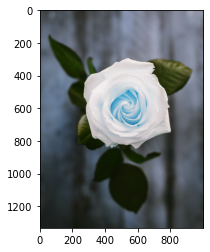

In [5]:
plt.imshow(img)
plt.show()

In [33]:
img
print(img)
(h, w, d) = img.shape
print("hight={}, wight = {} depth = {}".format(w, h, d))

[[[ 70  76  81]
  [ 69  75  80]
  [ 69  75  80]
  ...
  [114 119 134]
  [111 116 131]
  [109 114 129]]

 [[ 69  75  80]
  [ 69  75  80]
  [ 68  74  79]
  ...
  [115 120 135]
  [112 117 132]
  [110 115 130]]

 [[ 69  75  80]
  [ 69  75  80]
  [ 68  74  79]
  ...
  [117 121 139]
  [114 119 134]
  [112 117 132]]

 ...

 [[ 25  31  26]
  [ 25  31  26]
  [ 25  31  26]
  ...
  [ 46  52  51]
  [ 46  52  51]
  [ 46  52  51]]

 [[ 25  31  26]
  [ 25  31  26]
  [ 25  31  26]
  ...
  [ 46  52  51]
  [ 46  52  51]
  [ 46  52  51]]

 [[ 25  31  26]
  [ 25  31  26]
  [ 25  31  26]
  ...
  [ 46  52  51]
  [ 46  52  51]
  [ 46  52  51]]]
hight=1000, wight = 1333 depth = 3


# Image Translation 

Dịch ảnh theo trục Ox, Oy theo 50 pixel và 100 pixel
Image translation phương pháp dịch ảnh theo trục Ox, Oy với pixel cho trước

In [54]:
#using warpAffine
M = np.float32([[1,0,50],[0,1,100]])
img2 = cv2.warpAffine(img,M,(img.shape[1], img.shape[0]))
cv2.imshow('image translation', img2)
cv2.waitKey()
cv2.destroyAllWindows()

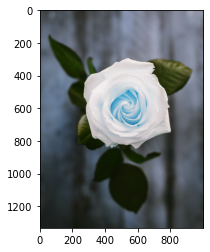

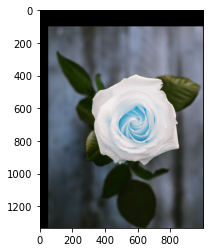

In [55]:
plt.imshow(img)
plt.show()
plt.imshow(img2)
plt.show()

# Simple Rotation

Xoay ảnh với góc /alpha cho trước
Tâm xoay thường là tâm của ảnh!

In [58]:
#remove180degrees
img3 = cv2.rotate(img, cv2.ROTATE_180)

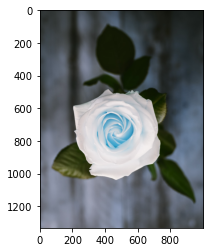

In [60]:
plt.imshow(img3)
plt.show()

In [63]:
#remove90degrees using CV2.rotate
img4 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

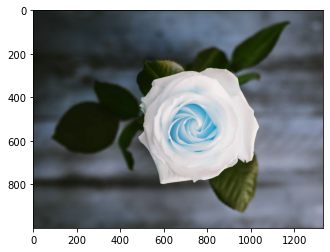

In [64]:
plt.imshow(img4)
plt.show()

In [89]:
#Center
(h,w) = img.shape[:2]
center = (h//2, w//2)

#Rotation matrix
M1 = cv2.getRotationMatrix2D(center, 30, 1.0)
 
#Rotation
img5 = cv2.warpAffine(img, M1, (w,h))


In [73]:
center

(666, 500)

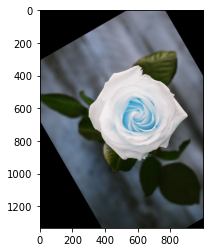

In [90]:
plt.imshow(img5)
plt.show()

# Better Rotation

In [9]:
#center
(h,w) = img.shape[:2]
center = (w//2, h//2)
#rotation matrix
M2 = cv2.getRotationMatrix2D(center, 30, 1.0)
cos = np.abs(M2[0,0])
sin = np.abs(M2[0,1])
#NewCenter
newWidth = int(w * cos + h * sin)
newHeight = int(w * sin + h * cos)
#translating in Rotation
M2[0, 2] += (newWidth / 2) - center[0]
M2[1, 2] += (newHeight / 2) - center[1]
#Rotation
img6 = cv2.warpAffine(img, M2, (newWidth, newHeight))


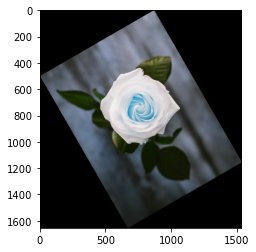

In [10]:
plt.imshow(img6)
plt.show()

In [115]:
cv2.imshow('rotation', img6)
cv2.waitKey(0)

-1

# resize


In [38]:
r1 = 100/ img.shape[1]
dim = (100, int(img.shape[0]*r1))
resized_img1 = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
cv2.imshow("Resized (Width)", resized_img1)

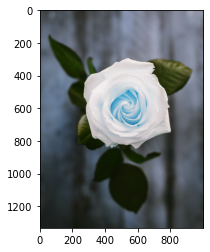

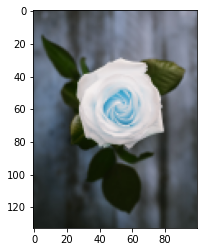

In [39]:
plt.imshow(img)
plt.show()
plt.imshow(resized_img1)
plt.show()

# FilPPING

In [40]:
flipped1 = cv2.flip(img, 1)
flipped2 = cv2.flip(img, -1)
flipped3 = cv2.flip(img, 0)

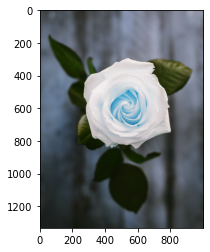

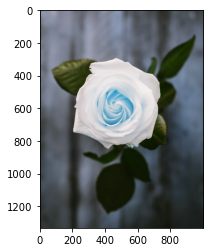

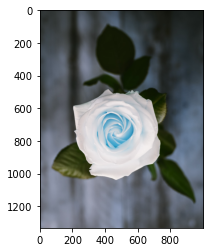

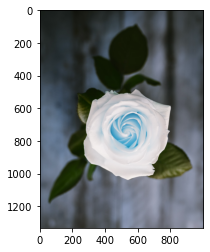

In [45]:
plt.imshow(img)
plt.show()
plt.imshow(flipped1)
plt.show()
plt.imshow(flipped2)
plt.show()
plt.imshow(flipped3)
plt.show()


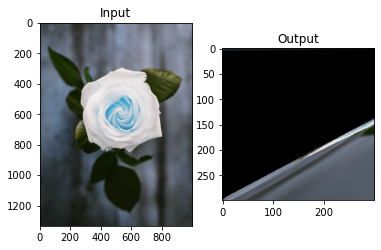

In [50]:
rows,cols,ch = img.shape
pts1 = np.float32([[0,56],[0,8],[800,0],[60,90]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(300,300))
plt.subplot(121)
plt.imshow(img),plt.title('Input')
plt.subplot(122),
plt.imshow(dst),plt.title('Output')
plt.show()